## RLDMUU 2025
#### Q-learning and SARSA
jakub.tluczek@unine.ch

Today we are going to implement two fundamental temporal difference algorithms - Q-learning and SARSA. Both of these algorithms choose action based on $Q(s,a)$ function, but update it in a diffetent manner. Q-learning update goes as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left[ r + \gamma \arg\max_a Q(s',a) - Q(s,a)\right] $$

While SARSA updates its $Q(s,a)$ in a following way:

$$ Q(s,a) \leftarrow \alpha \left[ r + \gamma Q(s', a') - Q(s,a) \right] $$

where $\alpha$ is a learning rate and $\gamma$ is a discount factor.

Difference between these two arises when computing the discounted value of $Q$ for next state. As $Q : S \times A \rightarrow \mathbb{R}$, we need to pick the next action. We can do it either by maximizing over all actions in an off-line fashion (Q-Learning) or assume that the next action will be picked using the same poicy $\pi$ we are currently following. 

Your task is to program both Q-Learning and SARSA from scratch:

In [59]:
import numpy as np
import random as rdm
class QLearning:
    def __init__(self, n_states, n_actions, alpha, gamma, epsilon):
        # TODO: Initialize the class
        self.n_states = n_states
        self.n_actions = n_actions
        self.epsilon = epsilon
        self.Q = np.zeros((n_states,n_actions))
        self.lr = alpha
        self.discout = gamma

    def act(self, state):
        # TODO: pick the action
        if rdm.uniform(0,1) <= self.epsilon:
            return np.random.choice(range(self.n_actions))
        else: 
            choices = np.where(np.max(self.Q[state, : ]) == self.Q[state, :])[0]
            return np.random.choice(choices)

    def update(self, state, action, reward, next_state):
        # TODO: Update the Q-table
        self.Q[state,action] += self.lr *(
            reward+self.discout *np.max(self.Q[next_state,:])-self.Q[state,action])
        
    def reset(self):
        # TODO: Reset the Q-tables 
        self.Q = np.zeros((self.n_states,self.n_actions))

In [63]:
class SARSA:
    def __init__(self, n_states, n_actions, alpha, gamma, epsilon):
        # TODO: Initialize the class
        self.n_states = n_states
        self.n_actions = n_actions
        self.epsilon = epsilon
        self.Q = np.zeros((n_states,n_actions))
        self.lr = alpha
        self.discout = gamma

    def act(self, state):
        # TODO: pick the action
        if rdm.uniform(0,1) <= self.epsilon:
            return np.random.choice(range(self.n_actions))
        else: 
            choices = np.where(np.max(self.Q[state, : ]) == self.Q[state, :])[0]
            return np.random.choice(choices)

    def update(self, state, action, reward, next_state):
        # TODO: Update the Q-table
        self.Q[state,action] += self.lr *(
            reward+self.discout * self.Q[next_state,self.act(next_state)]-self.Q[state,action])
        
    def reset(self):
        # TODO: Reset the Q-tables 
        self.Q = np.zeros((self.n_states,self.n_actions))

### Gymnasium

Now let's introduce a python framework that you are going to work with over the course of this semester, namely `gymnasium`, which is the successor of OpenAI `gym`. Let's go through the basic functionality of `gymnasium` based environments. First, let's import a Frozen Lake environment:

In [41]:
import gymnasium as gym

env = gym.make('FrozenLake-v1', is_slippery = False)

Before the first use, and after each episode we have to reset an environment. `reset()` function returns the state represenation and an additional dictionary `info`, if we ever wanted to collect some additional data about the environment. For now we won't take it into consideration.

In [42]:
state, info = env.reset()
# useful for checking if the environment terminated
done = False

In [43]:
state, info

(0, {'prob': 1})

*Hint*: In order to create Q tables we have to know the size of the state and action space. We can check it with:

In [44]:
print(f"Observation space size: {env.observation_space}")
print(f"Action space size: {env.action_space}")

Observation space size: Discrete(16)
Action space size: Discrete(4)


Now let's act on the environment and observe the results (we sample the action for now). For this reason we provide an action to the `step` method and observe the following:

- `next_state` to which we transition
- `reward` received
- `done` signal, indicating if the environment terminated
- `truncated` signal, indicating whether a timeout or other external constraint had been reached
- `info` dict with supplementary information

In [45]:
action = env.action_space.sample()

next_state, reward, done, truncated, info = env.step(action)

In [46]:
env.action_space.sample()

1

In [47]:
env.observation_space.sample()

10

Your task is to perform both Q-Learning and SARSA to learn the optimal policy for an agent acting in an environment. After you're done, plot the rewards.

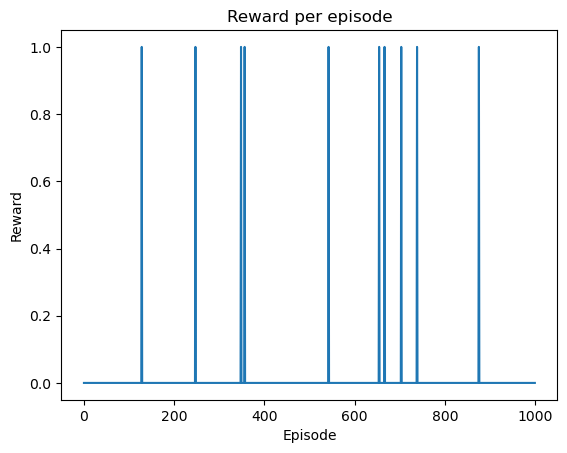

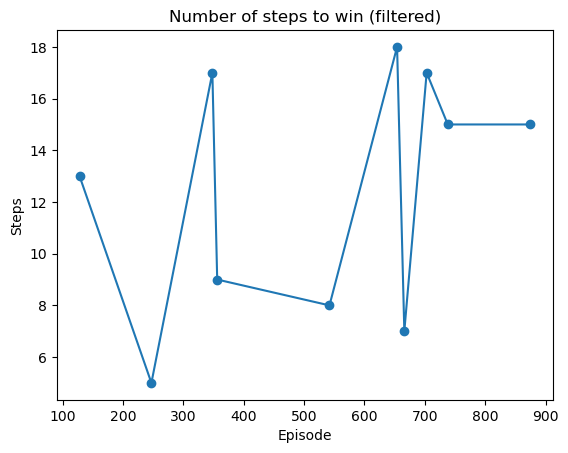

In [ ]:
N_EPISODE = 1000
N_ITER = 1000
ALPHA = 1e-2
GAMMA = 0.5
epsilon = 1e-1

state, info = env.reset()

done = False

algorithm = QLearning(env.observation_space.n,
                      env.action_space.n,
                      alpha=ALPHA,
                      gamma=GAMMA,
                      epsilon=epsilon)

nsteps = np.ones(N_EPISODE) * N_ITER
reward_attempts = np.zeros((N_EPISODE,N_ITER))
for e in range(N_EPISODE):
    for i in range(N_ITER):
        action = algorithm.act(state)

        next_state, reward, done, truncated, info = env.step(action)
        reward_attempts[e,i] = reward
        # truncated = not done but stuck.
        # done is won or died
        # info is every other information besides the returned ones.

        algorithm.update(state, action, reward, next_state)

        if done or truncated:
            state, info = env.reset()
            done = False
            truncated = False
            if reward == 1:
                nsteps[e] = i #Save amount of steps to win
            break
        
        state = next_state

    algorithm.reset()

import matplotlib.pyplot as plt
plt.plot(np.sum(reward_attempts,axis=1))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward per episode')
plt.show()

filtered_steps = nsteps[nsteps < N_ITER]
filtered_episodes = np.where(nsteps < N_ITER)[0]
plt.plot(filtered_episodes, filtered_steps, marker='o')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Number of steps to win (filtered)')
plt.show()





In [ ]:
print(np.argmin(nsteps))
print(np.min(nsteps))

102
5.0


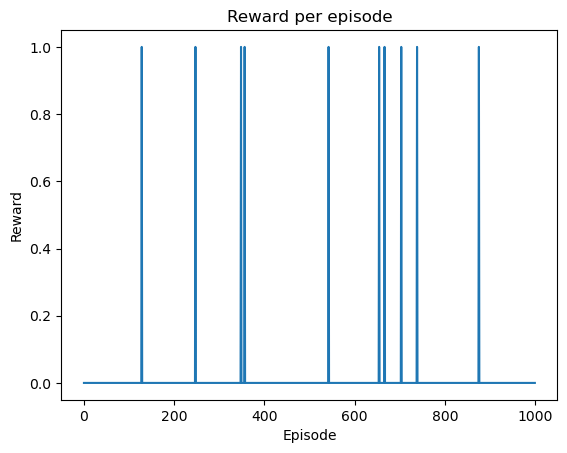

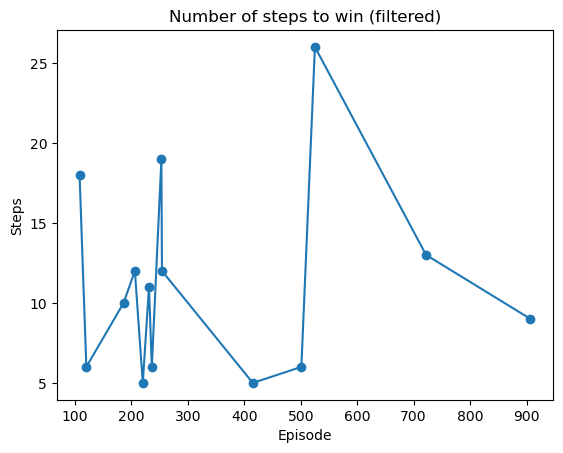

In [ ]:
state, info = env.reset()

done = False

algorithm = SARSA(env.observation_space.n,
                      env.action_space.n,
                      alpha=ALPHA,
                      gamma=GAMMA,
                      epsilon=epsilon)

nsteps = np.ones(N_EPISODE) * N_ITER
for e in range(N_EPISODE):
    for i in range(N_ITER):
        action = algorithm.act(state)

        next_state, reward, done, truncated, info = env.step(action)
        # truncated = not done but stuck.
        # done is won or died
        # info is every other information besides the returned ones.

        algorithm.update(state, action, reward, next_state)

        if done or truncated:
            state, info = env.reset()
            done = False
            truncated = False
            if reward == 1:
                nsteps[e] = i #Save the amount of steps to win
            break
        
        state = next_state

    algorithm.reset()

import matplotlib.pyplot as plt

plt.plot(np.sum(reward_attempts,axis=1))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward per episode')
plt.show()

filtered_steps = nsteps[nsteps < N_ITER]
filtered_episodes = np.where(nsteps < N_ITER)[0]
plt.plot(filtered_episodes, filtered_steps, marker='o')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Number of steps to win (filtered)')
plt.show()

In [86]:
print(np.argmin(nsteps))
print(np.min(nsteps))

220
5.0
